
[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\basun\AppData\Local\Temp\ipykernel_25900\2428282292.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=hourly, palette="Blues_d")


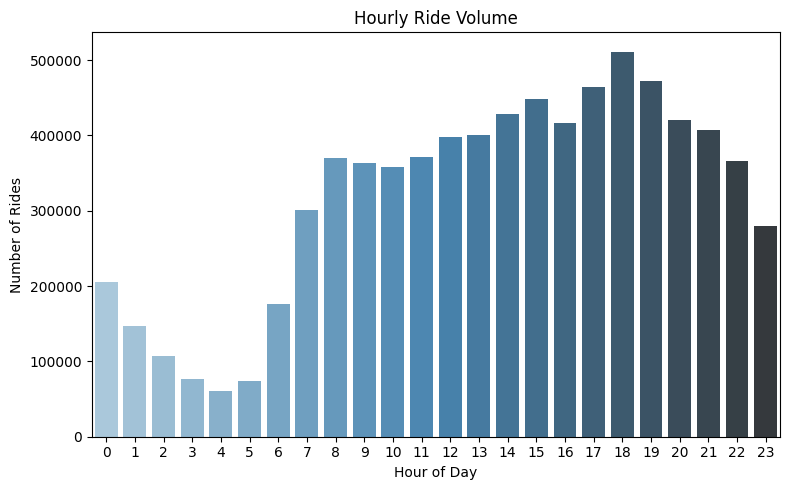

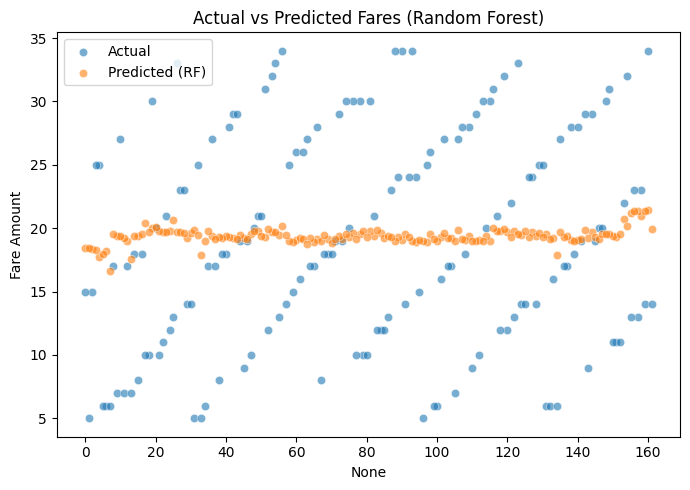

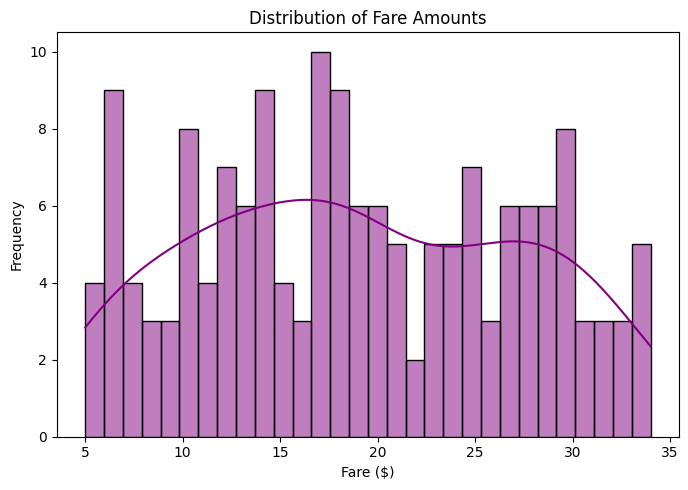

C:\Users\basun\AppData\Local\Temp\ipykernel_25900\2428282292.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PULocationID", y="count", data=top_pickups, palette="viridis")


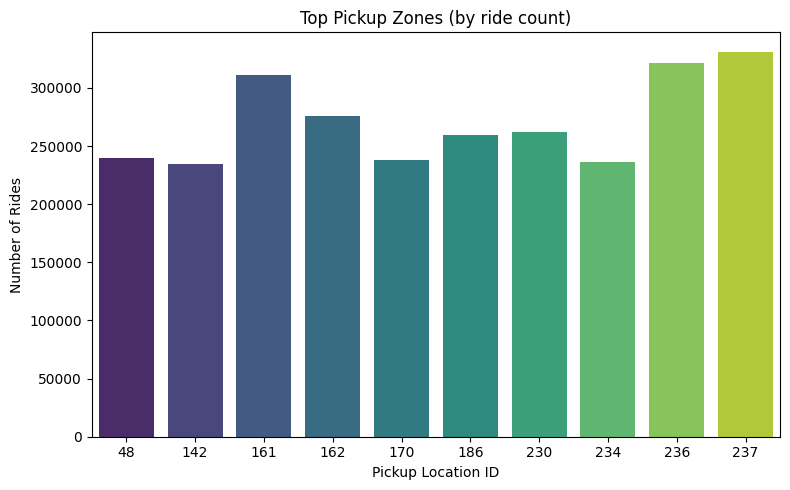

✅ Visualizations saved in: C:\Users\basun\OneDrive\Desktop\Programming practice\bigdata_project\outputs


In [32]:
!pip install matplotlib seaborn

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

OUTPUT_DIR = r"C:\Users\basun\OneDrive\Desktop\Programming practice\bigdata_project\outputs"

# ======================
# Load outputs from Task 1
# ======================
hourly = pd.read_csv(os.path.join(OUTPUT_DIR, "hourly_volume.csv"))
percentiles = pd.read_csv(os.path.join(OUTPUT_DIR, "percentiles.csv"))
top_pickups = pd.read_csv(os.path.join(OUTPUT_DIR, "top_pickups.csv"))

# Load predictions from Task 2
pred_lr = pd.read_csv(os.path.join(OUTPUT_DIR, "predictions_linear.csv"))
pred_rf = pd.read_csv(os.path.join(OUTPUT_DIR, "predictions_randomforest.csv"))

# ======================
# 1) Hourly Ride Volume
# ======================
plt.figure(figsize=(8,5))
sns.barplot(x="hour", y="count", data=hourly, palette="Blues_d")
plt.title("Hourly Ride Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "viz_hourly.png"))
plt.show()

# ======================
# 2) Fare vs Distance (sample)
# ======================
plt.figure(figsize=(7,5))
sample = pred_rf.sample(n=min(1000, len(pred_rf)), random_state=42)
sns.scatterplot(x=sample.index, y="fare_amount", data=sample, label="Actual", alpha=0.6)
sns.scatterplot(x=sample.index, y="prediction", data=sample, label="Predicted (RF)", alpha=0.6)
plt.title("Actual vs Predicted Fares (Random Forest)")
plt.ylabel("Fare Amount")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "viz_fare_pred.png"))
plt.show()

# ======================
# 3) Trip Distance Distribution
# ======================
plt.figure(figsize=(7,5))
sns.histplot(sample["fare_amount"], bins=30, kde=True, color="purple")
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "viz_fare_dist.png"))
plt.show()

# ======================
# 4) Top Pickup Zones
# ======================
plt.figure(figsize=(8,5))
sns.barplot(x="PULocationID", y="count", data=top_pickups, palette="viridis")
plt.title("Top Pickup Zones (by ride count)")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "viz_top_pickups.png"))
plt.show()

print("✅ Visualizations saved in:", OUTPUT_DIR)
